In [124]:
import pandas as pd

In [125]:
housing = pd.read_csv('D:\Data\housing.csv.txt')

In [126]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [127]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [128]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [129]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [130]:
%matplotlib inline

In [131]:
import matplotlib.pyplot as plt

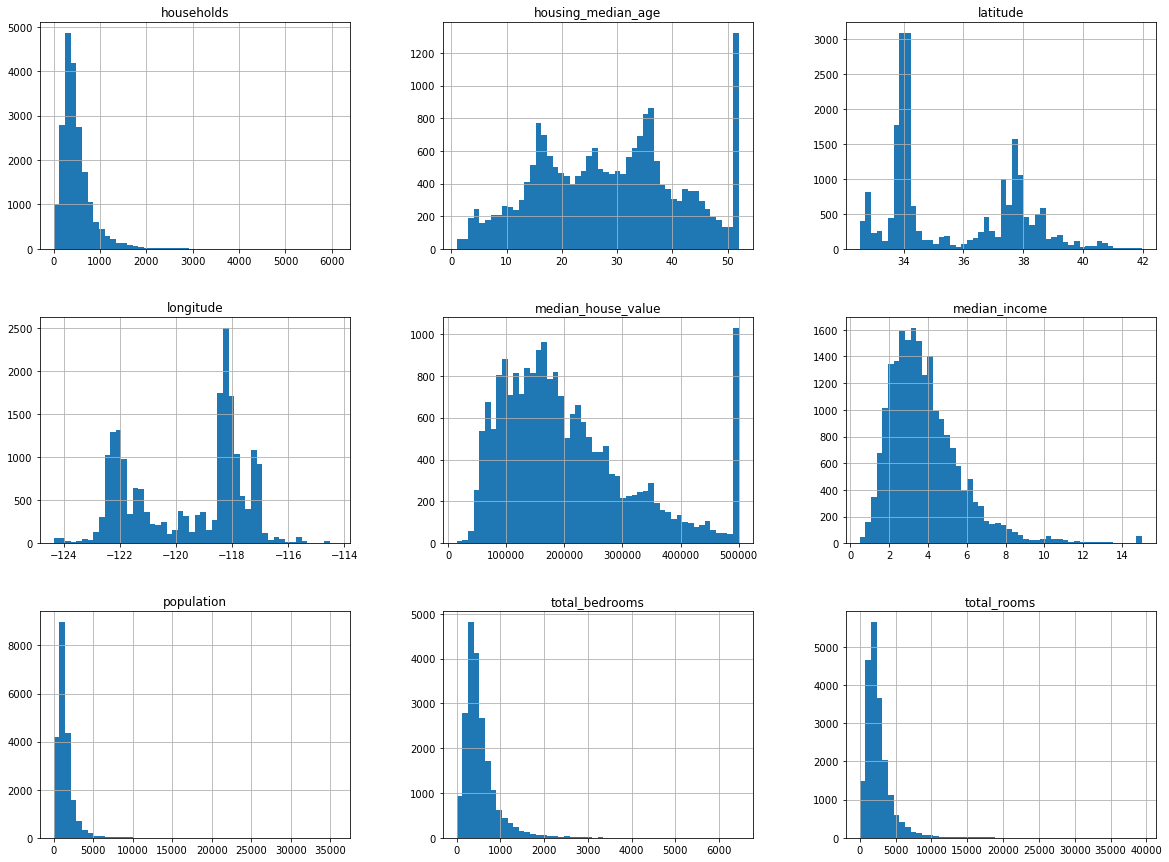

In [132]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [133]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

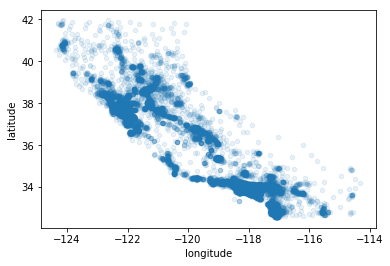

In [134]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

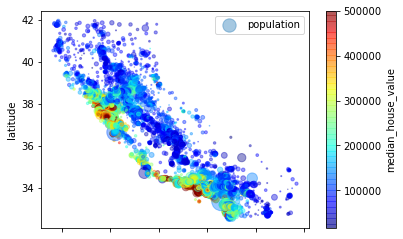

In [135]:
housing.plot(kind="scatter", x="longitude", y ="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

## Finding correlation

In [136]:
corr_matrix = housing.corr()

In [137]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [138]:
corr_matrix["population"].sort_values(ascending=False)

population            1.000000
households            0.907222
total_bedrooms        0.877747
total_rooms           0.857126
longitude             0.099773
median_income         0.004834
median_house_value   -0.024650
latitude             -0.108785
housing_median_age   -0.296244
Name: population, dtype: float64

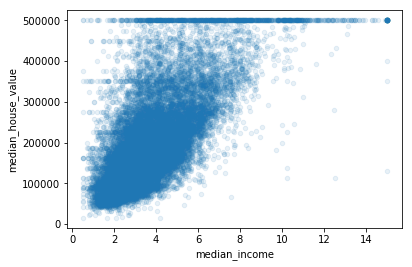

In [139]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [140]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [141]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [142]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

In [143]:
corr_matrix = housing.corr()
corr_matrix["population"].sort_values(ascending=False)

population             1.000000
households             0.907222
total_bedrooms         0.877747
total_rooms            0.857126
longitude              0.099773
bedrooms_per_room      0.035319
median_income          0.004834
median_house_value    -0.024650
rooms_per_household   -0.072213
latitude              -0.108785
housing_median_age    -0.296244
Name: population, dtype: float64

#### Prepare Data for MLA

In [144]:
housing.dropna(subset=["total_bedrooms"])
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
5         213.0
6         489.0
7         687.0
8         665.0
9         707.0
10        434.0
11        752.0
12        474.0
13        191.0
14        626.0
15        283.0
16        347.0
17        293.0
18        455.0
19        298.0
20        184.0
21        367.0
22        541.0
23        337.0
24        437.0
25        123.0
26        244.0
27        421.0
28        492.0
29        160.0
          ...  
20610     484.0
20611     441.0
20612     289.0
20613     365.0
20614     460.0
20615     216.0
20616     441.0
20617     109.0
20618     247.0
20619     340.0
20620      41.0
20621     247.0
20622     147.0
20623     244.0
20624     300.0
20625      17.0
20626     184.0
20627      65.0
20628     421.0
20629    1856.0
20630     505.0
20631     493.0
20632     416.0
20633     412.0
20634     395.0
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, dt

#### Handling Text & Categorical Attributes
* This is a transformer
* fit is to be used for training estimators
* fit_transform to be used for transformers

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]

In [147]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [148]:
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [149]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [150]:
housing["OPN"] = housing_cat_encoded

In [151]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,OPN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,3


In [152]:
housing.values[:,3]

array([880.0, 7099.0, 1467.0, ..., 2254.0, 1860.0, 2785.0], dtype=object)

In [153]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
encoder = OneHotEncoder()

In [155]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape((-1,1)))

In [156]:
housing_cat_encoded.reshape((-1,1))

array([[3],
       [3],
       [3],
       ..., 
       [1],
       [1],
       [1]], dtype=int64)

In [157]:
housing_cat_1hot.toarray()

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [158]:
encoder.get_params

<bound method BaseEstimator.get_params of OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)>

### Custom Transformers
* Custom cleanup operation
* Combining spefic attributes
* Transformer should have a fit_transform() function implemented
* The transformer class should extend base class TransformerMixin
* If you want set_params() & get_params(), extend BaseExtimator class
* np_c - This adds more columns to dataframe 

In [159]:
from sklearn.base import BaseEstimator, TransformerMixin

In [160]:
rooms_ix, bedrooms_ix, population_ix, househiold_ix = 3,4,5,6

In [161]:
import numpy as np
class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:, househiold_ix]
        population_per_household = X[:, population_ix] / X[:, househiold_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] 
            if bedrooms_per_room > 5:
                bedrooms_per_room += 10
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAddr(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [162]:
housing_extra_attribs.shape

(20640, 15)

In [163]:
housing.values.shape

(20640, 13)

In [164]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  For detailed documentation, see `r_`.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from AxisConcatenator:
 |  
 |  __

In [165]:
attr_adder = CombinedAttributesAddr(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

C:\Users\ZekeLabs\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
housing_extra_attribs.shape

### Select & Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

### Transformation Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler,Imputer, LabelBinarizer

Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer.

Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is how to use it. First, you need to create an Imputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [ ]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAddr()),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
housing_num.head()

In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

In [ ]:
encoder = LabelBinarizer()

In [ ]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

In [ ]:
housing_cat

In [ ]:
from sklearn.pipeline import FeatureUnion

In [ ]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline), 
    ("cat_pipeline", cat_pipeline),])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
 cat_pipeline.fit_transform(housing).shape

In [ ]:
num_pipeline.fit_transform(housing_num).shape

In [ ]:
import numpy as np

In [ ]:
a = np.arange(10).reshape(2,5)a
b = np.arange(6).reshape(2,3)

In [ ]:
a

In [ ]:
b

In [ ]:
np.hstack([a,b])

In [ ]:
housing_prepared = np.hstack([cat_pipeline.fit_transform(housing),num_pipeline.fit_transform(housing_num)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(housing_prepared, housing['median_house_value'])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
housing_prediction = lin_reg.predict(housing_prepared)

In [ ]:
lin_mse = mean_squared_error(housing['median_house_value'], housing_prediction)

In [ ]:
np.sqrt(lin_mse)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyperparameter tuning
# Every model requires some initial parameters, how do you find the best params

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(housing_prepared,housing['median_house_value'])

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [166]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing.data:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feature do not more or less look like standard normally
 |  distributed data (e.g. Gaussian with 0 mean and unit variance).
 |  
 |  For instance many elements used in the objective function of
 |  a learning algorithm (such as the RBF kernel of Support Vector
 |  Machines or the L1 and L2 regularizers of linear models) assume that
 |  all features are centered around 0 an

### Exercises
* Try replacing GridSearchCV with RandomizedSearchCV.